<h1 style="text-align: center;">Two-dimensional particle motion simulation</h1>

# 1. Idea

The idea of two-dimensional particle motion is the same as that of one-dimensional particle motion. We assume that there are 10 particles in the xy plane and that there are forces interacting between these particles which cause the particles to gain acceleration and thus displacement.

# 2. Details

## 2.1 Randomly generated particle coordinates
We can randomly generate the coordinates of 10 particles by

In [1]:
import random
import numpy as np

def Initial_position(n):
    np.random.seed(0)
    p = np.random.rand(n, 2)
    return p

Initial_position(10)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

We can see the position of the coordinates of the 10 particles generated, and in the diagram (for ease of observation, different colours are used here to distinguish the particles):

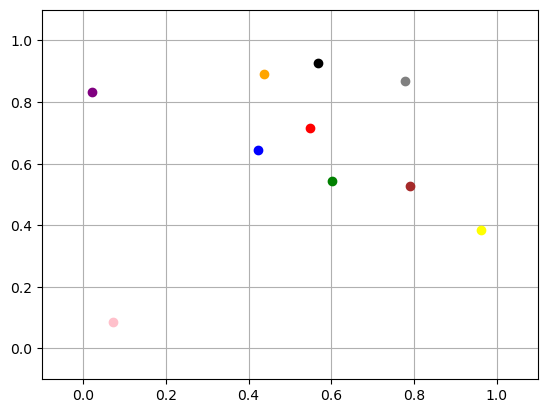

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(p):
    plt.clf()
    xpos = p[:, 0]    # All x-axis coordinates
    ypos = p[:, 1]    # All y-axis coordinates
    n = len(p)
    color = ['red', 'green', 'blue', 'orange', 'yellow', 'brown', 'black', 'pink', 'purple', 'Gray'] 
    n_color = len(color)
    for i in range(n):
        plt.plot(xpos[i], ypos[i], "o", color=color[i % n_color])
    plt.xlim(left=-0.1, right=1.1)
    plt.ylim(bottom=-0.1, top=1.1)
    plt.grid()
    plt.draw()
    
plot(Initial_position(10))

## 2.2 Interaction forces between particles

The interaction forces between the particles are related to the spacing between them and their relationship is given by
$$f(r)=C_1⋅/ (r ⋅ C_2)$$
r is the distance between two particles, C_1 and C_2 are constants, and we can set them to 1 initially, but we may want to change it later. This means that the further apart the particles are, the less force they have.

But this is only the interaction force between a pair of particles, so we need to calculate the combined force using the 'for loop'.
$$𝐹=𝑓1+𝑓2+⋯+𝑓9$$

In [4]:
# Calculate the strength of the repulsion
def force(r, c1=1, c2=1):
    f = c1 / (np.linalg.norm(r) * c2) * np.sign(r)
    return f

# Calculate the total force for each particle
def combined_force(p, n):
    total_force = np.zeros_like(p)
    for i in range(n):
        fn_sum = np.zeros(2)
        for j in range(n):
            if j != i:
                r = p[j] - p[i]
                fn =  -1 * force(r)
                fn_sum += fn 
            total_force[i] = fn_sum
    return total_force

## 2.3 Displacement of particles

According to Newton law, there are two forces. F is the total force of the interaction with all the other particles, the other one is negative friction times velocity (the friction resistance).

$$ma=F-ηv$$
                            
In our simple model, suppose the particle has zero mass, so:

$$ηv=F$$

And with velocity, we can introduce the displacement Δx. This represents the displacement of Δx that the particle will produce after every period of time Δt.

$$v=\frac{dr}{dt}=\frac{F}{η}≈\frac{∆x}{∆t}$$
                        
$$∆x=\frac{F}{η}⋅∆t$$

This is the displacement ∆x produced by the particle after each passage of ∆t:

In [5]:
def displacement(total_force, eta=1, delta_t=1):
    displacement = total_force / eta * delta_t
    return displacement

## 2.4 Update the position of particles

For each particle we need to update its position, so here a for loop is used to accumulate the displacement of each particle. But here a boundary condition needs to be added that the position of the particle always stays within (0,10).

In [6]:
def update_position(p, delta_r, min_x=0, max_x=1):
    new_pos = p + delta_r
    x_out_of_bounds = np.logical_or(new_pos[:,0] > max_x, new_pos[:,0] < min_x)
    y_out_of_bounds = np.logical_or(new_pos[:,1] > max_x, new_pos[:,1] < min_x)
    new_pos[x_out_of_bounds, 0] = np.clip(new_pos[x_out_of_bounds, 0], min_x, max_x)
    new_pos[y_out_of_bounds, 1] = np.clip(new_pos[y_out_of_bounds, 1], min_x, max_x)
    return new_pos

## 2.5 Main function

                            
By calculating the displacements at each time step and accumulating them through a for loop, we can obtain the final time displacements

$$x(t_{i+1} )=x(t_i )+∆x(t_i )$$

So ultimately, we can use this method to figure out how particles move over time.

Here, we can string all the functions together in one main function and output the result:

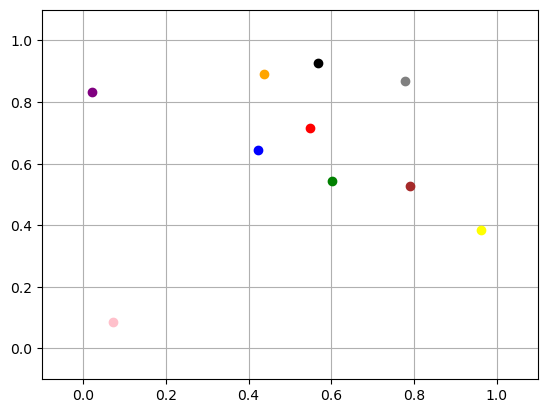

P(0):
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]]


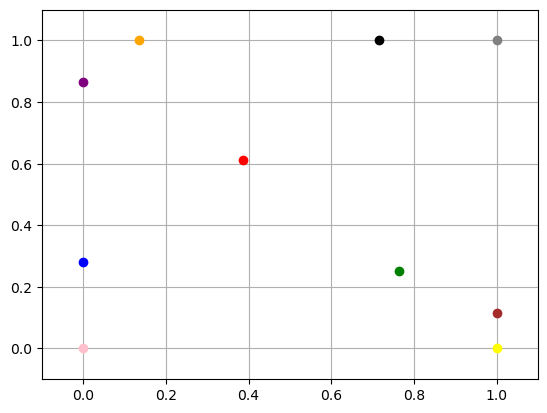

P(500):  [[0.38647431 0.61272993]
 [0.76521644 0.25135491]
 [0.         0.28024363]
 [0.13540576 1.        ]
 [1.         0.        ]
 [1.         0.11430592]
 [0.71481181 1.        ]
 [0.         0.        ]
 [0.         0.8663415 ]
 [1.         1.        ]]


In [25]:
%matplotlib inline

def simulate(n, time_step, show_plot=True):
    p = Initial_position(n)
    update_plot(p)
    print("P(0):\n", p)
    for i in range(time_step):
        total_force = combined_force(p, n)
        x_det = displacement(total_force, delta_t=0.001)
        p = update_position(p, x_det)
    update_plot(p)
    print("P({}): ".format(time_step), p)


def update_plot(pos):
    plt.clf()
    xpos = pos[:, 0]
    ypos = pos[:, 1]
    N = len(pos)
    color = ['red', 'green', 'blue', 'orange', 'yellow', 'brown', 'black', 'pink', 'purple', 'Gray']
    N_color = len(color)
    for i in range(N):
        plt.plot(xpos[i], ypos[i], "o", color=color[i % N_color])
    plt.xlim(left=-0.1, right=1.1)
    plt.ylim(bottom=-0.1, top=1.1)
    plt.grid()
    plt.draw()
    plt.pause(0.0001)

simulate(10, 500, show_plot=True)

# 3. Full code

In [22]:
%matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np


def Initial_position(n):
    np.random.seed(0)
    p = np.random.rand(n, 2)
    return p
    
    
# Calculate the strength of the repulsion
def force(r, c1=1, c2=1):
    f = c1 / (np.linalg.norm(r) * c2) * np.sign(r)
    return f


# Calculate the total force for each particle
def combined_force(p, n):
    total_force = np.zeros_like(p)
    for i in range(n):
        fn_sum = np.zeros(2)
        for j in range(n):
            if j != i:
                r = p[j] - p[i]
                fn =  -1 * force(r)
                fn_sum += fn 
            total_force[i] = fn_sum
    return total_force


def displacement(total_force, eta=1, delta_t=1):
    displacement = total_force / eta * delta_t
    return displacement


def update_position(p, delta_r, min_x=0, max_x=1):
    new_pos = p + delta_r
    x_out_of_bounds = np.logical_or(new_pos[:,0] > max_x, new_pos[:,0] < min_x)
    y_out_of_bounds = np.logical_or(new_pos[:,1] > max_x, new_pos[:,1] < min_x)
    new_pos[x_out_of_bounds, 0] = np.clip(new_pos[x_out_of_bounds, 0], min_x, max_x)
    new_pos[y_out_of_bounds, 1] = np.clip(new_pos[y_out_of_bounds, 1], min_x, max_x)
    return new_pos


def simulate(n, time_step, show_plot=True):
    p = Initial_position(n)
#    print("P(0):\n", p)
    for i in range(time_step):
        total_force = combined_force(p, n)
        x_det = displacement(total_force, delta_t=0.0001)
        p = update_position(p, x_det)
        pos = p
        if show_plot:
            if i % 2 == 0:
                update_plot(pos)
#    print("P({}): ".format(time_step), p)


def update_plot(pos):
    plt.clf()
    xpos = pos[:, 0]
    ypos = pos[:, 1]
    N = len(pos)
    color = ['red', 'green', 'blue', 'orange', 'yellow', 'brown', 'black', 'pink', 'purple', 'Gray']
    N_color = len(color)
    for i in range(N):
        plt.plot(xpos[i], ypos[i], "o", color=color[i % N_color])
    plt.xlim(left=-0.1, right=1.1)
    plt.ylim(bottom=-0.1, top=1.1)
    plt.grid()
    plt.draw()
    plt.pause(0.0001)


Using matplotlib backend: QtAgg


In [ ]:
simulate(10, 500, show_plot=True)

In [23]:
simulate(50, 500, show_plot=True)